In [83]:
import os
!pip install -q kaggle

if not os.path.exists("/root/.kaggle/kaggle.json"):
    from google.colab import files
    print("Upload your kaggle.json file from your Kaggle account")
    files.upload()
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
else:
    print("kaggle.json already configured")

if not os.path.exists("accepted_2007_to_2018Q4.csv.gz"):
    print("Downloading Lending Club dataset...")
    !kaggle datasets download -d wordsforthewise/lending-club -q
    !unzip -q lending-club.zip
    print("Dataset downloaded & extracted")
else:
    print("Dataset already available")

✅ kaggle.json already configured
✅ Dataset already available


In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score,
    f1_score,
    classification_report,
    confusion_matrix
)


import warnings

warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [85]:
df = pd.read_csv("accepted_2007_to_2018Q4.csv.gz", low_memory=False, nrows=200000)

In [86]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.shape

(200000, 151)

In [88]:
df.info

<bound method DataFrame.info of               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       68407277        NaN     3600.0       3600.0           3600.0   
1       68355089        NaN    24700.0      24700.0          24700.0   
2       68341763        NaN    20000.0      20000.0          20000.0   
3       66310712        NaN    35000.0      35000.0          35000.0   
4       68476807        NaN    10400.0      10400.0          10400.0   
...          ...        ...        ...          ...              ...   
199995  56080425        NaN    12000.0      12000.0          12000.0   
199996  55909672        NaN    21000.0      21000.0          21000.0   
199997  54414556        NaN    27500.0      27500.0          27500.0   
199998  56109383        NaN     7000.0       7000.0           7000.0   
199999  56129522        NaN    23000.0      23000.0          23000.0   

              term  int_rate  installment grade sub_grade  ...  \
0        36 months     13.99       123.03     C        C4  ...   
1        36 months     11.99       820.28     C        C1  ...   
2        60 months     10.78       432.66     B        B4  ...   
3        60 months     14.85       829.90     C        C5  ...   
4        60 months     22.45       289.91     F        F1  ...   
...            ...       ...          ...   ...       ...  ...   
199995   36 months     12.69       402.54     C        C2  ...   
199996   36 months     12.29       700.42     C        C1  ...   
199997   60 months     14.65       649.19     C        C5  ...   
199998   36 months     10.99       229.14     B        B4  ...   
199999   60 months     13.99       535.06     C        C4  ...   

       hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                 NaN                          NaN   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   
...                               ...                          ...   
199995                            NaN                          NaN   
199996                            NaN                          NaN   
199997                            NaN                          NaN   
199998                            NaN                          NaN   
199999                            NaN                          NaN   

       disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                     Cash                     N                       NaN   
1                     Cash                     N                       NaN   
2                     Cash                     N                       NaN   
3                     Cash                     N                       NaN   
4                     Cash                     N                       NaN   
...                    ...                   ...                       ...   
199995                Cash                     N                       NaN   
199996                Cash                     N                       NaN   
199997                Cash                     N                       NaN   
199998                Cash                     N                       NaN   
199999                Cash                     N                       NaN   

       settlement_status settlement_date settlement_amount  \
0                    NaN             NaN               NaN   
1                    NaN             NaN               NaN   
2                    NaN             NaN               NaN   
3                    NaN             NaN               NaN   
4                    NaN             NaN               NaN   
...                  ...             ...               ...   
199995               NaN             NaN               NaN   
199996               NaN            

> **TASK 1**

In [89]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).head(15)

,0
member_id,100.0000
sec_app_num_rev_accts,100.0000
sec_app_open_act_il,100.0000
sec_app_inq_last_6mths,100.0000
sec_app_open_acc,100.0000
sec_app_mort_acc,100.0000
sec_app_mths_since_last_major_derog,100.0000
sec_app_collections_12_mths_ex_med,100.0000
sec_app_chargeoff_within_12_mths,100.0000
sec_app_fico_range_low,100.0000


In [90]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,140992
Charged Off,35090
Current,22637
Late (31-120 days),785
In Grace Period,347
Late (16-30 days),148
Default,1


In [91]:
df['income_to_loan_ratio'] = df['annual_inc'] / (df['loan_amnt'] + 1)
df['installment_to_income_ratio'] = df['installment'] / (df['annual_inc'] + 1)
df['log_annual_inc'] = np.log1p(df['annual_inc'])

In [92]:
valid_statuses = ['Fully Paid', 'Charged Off', 'Default']
df = df[df['loan_status'].isin(valid_statuses)].copy()

In [93]:
df['loan_default'] = df['loan_status'].apply(
    lambda x: 1 if x in ['Charged Off', 'Default'] else 0
)
df['loan_default'].value_counts(normalize=True)

,proportion
loan_default,
0,0.800713
1,0.199287


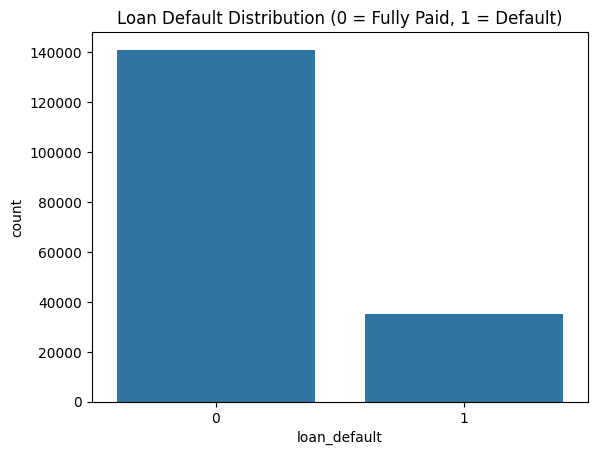

,proportion
loan_default,
0,0.800713
1,0.199287


In [94]:
# Check class balance
sns.countplot(x='loan_default', data=df)
plt.title("Loan Default Distribution (0 = Fully Paid, 1 = Default)")
plt.show()

df['loan_default'].value_counts(normalize=True)

In [95]:
selected_features = [
    'loan_amnt', 'term', 'int_rate', 'installment',
    'grade', 'sub_grade', 'emp_length', 'home_ownership',
    'annual_inc', 'purpose', 'dti', 'loan_default'
]

df = df[selected_features]

In [96]:
missing = df.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0])

emp_length    0.063232
dti           0.000011
dtype: float64


In [97]:
# Fill numeric columns with median
num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'purpose']
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

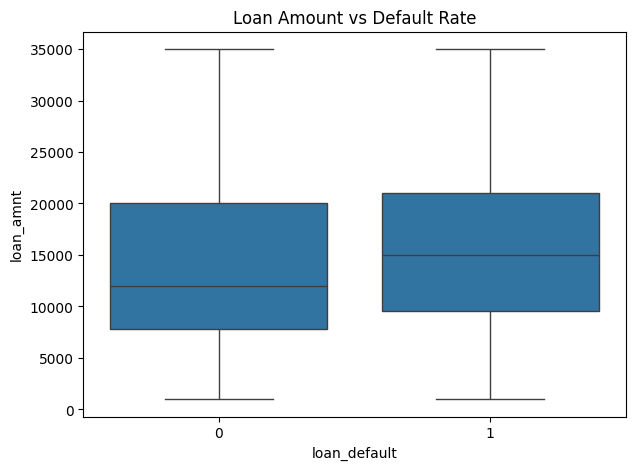

In [98]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_default', y='loan_amnt', data=df)
plt.title('Loan Amount vs Default Rate')
plt.show()

Observation: Higher loan amounts often → higher default probability.

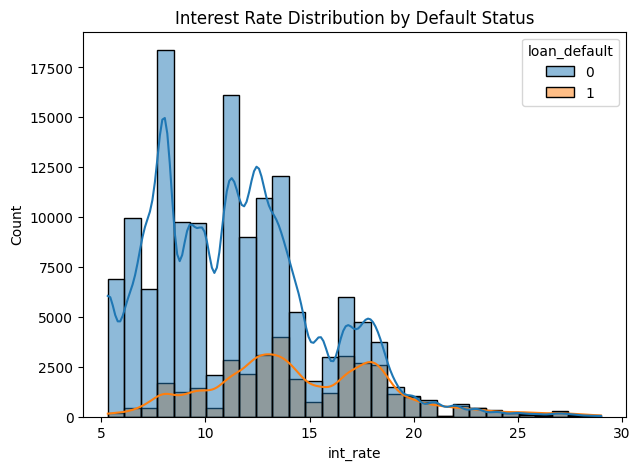

In [99]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='int_rate', hue='loan_default', bins=30, kde=True)
plt.title('Interest Rate Distribution by Default Status')
plt.show()

Defaults are more common for loans with high interest rates.

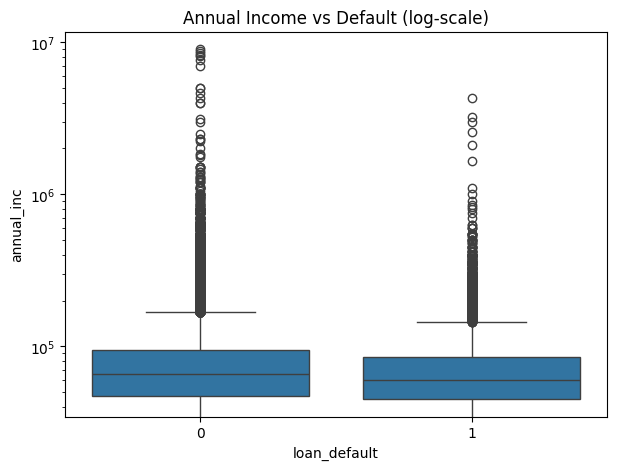

In [100]:
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_default', y='annual_inc', data=df)
plt.yscale('log')
plt.title('Annual Income vs Default (log-scale)')
plt.show()

Lower-income applicants tend to default more.

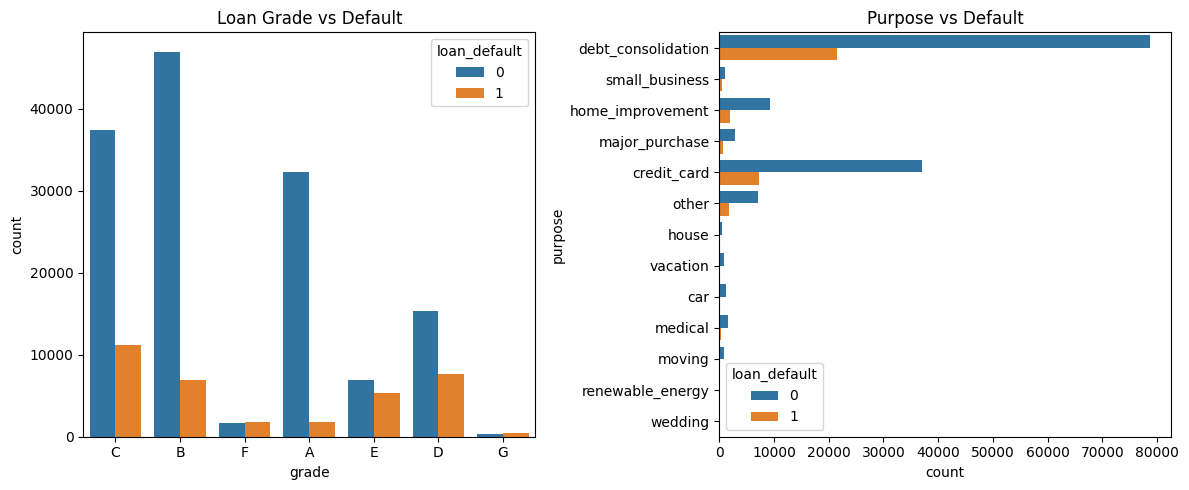

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x='grade', hue='loan_default', data=df, ax=axes[0])
axes[0].set_title('Loan Grade vs Default')

sns.countplot(y='purpose', hue='loan_default', data=df, ax=axes[1])
axes[1].set_title('Purpose vs Default')
plt.tight_layout()
plt.show()

Certain loan grades (e.g., F, G) and purposes (like small_business, debt_consolidation) have higher default risk.

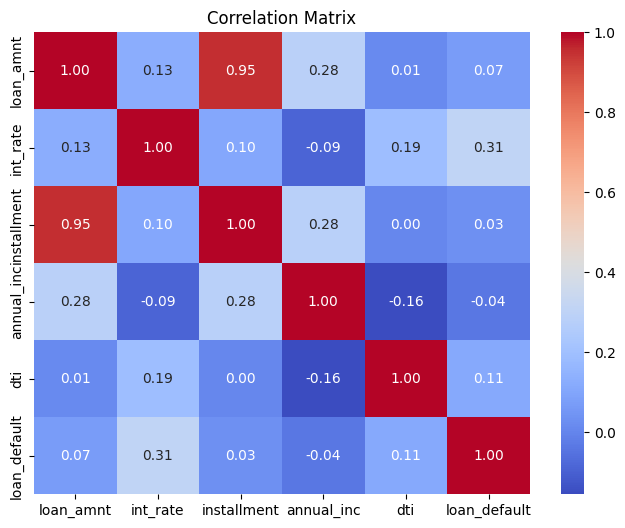

In [102]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols + ['loan_default']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

| **Insight** | **Business Interpretation** |
|--------------|-----------------------------|
| High interest rate → more defaults | Riskier borrowers are charged more, but also default more |
| Low income & high DTI → more defaults | Financially stressed applicants default easily |
| Longer term loans (60 months) → higher default | More uncertainty over time |
| Lower grade (F, G) → high default | Lending Club’s internal grade works well as a risk proxy |
| Purpose: small business, renewable energy → riskier loans | These are less predictable income sources |


In [103]:
features = num_cols + cat_cols
X = df[features]
y = df['loan_default']

> **TASK 2**

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [105]:
reward_features = ['loan_amnt', 'int_rate']

X_test_reward_features = X_test[reward_features].copy()
X_train_reward_features = X_train[reward_features].copy()

X_train = X_train[features]
X_test = X_test[features]

In [106]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

feature_names = (
    num_cols +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))
)

# Convert to dense arrays if they are sparse (Keras prefers dense)
if hasattr(X_train_processed, "toarray"):
    X_train_processed = X_train_processed.toarray()
    X_test_processed = X_test_processed.toarray()

print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed test data shape: {X_test_processed.shape}")

Processed training data shape: (140866, 76)
Processed test data shape: (35217, 76)


In [107]:
input_dim = X_train_processed.shape[1]

In [108]:
model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.BatchNormalization(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

In [109]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 76)             │           304 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,601 (29.69 KB)

 Trainable params: 7,321 (28.60 KB)

 Non-trainable params: 280 (1.09 KB)

In [110]:
neg, pos = np.bincount(y_train)
total = neg + pos
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Class weights: {{0: {weight_for_0:.2f}, 1: {weight_for_1:.2f}}}")

Class weights: {0: 0.62, 1: 2.51}


In [111]:
early_stopping = EarlyStopping(
    monitor='val_auc',
    patience=3,
    mode='max',
    restore_best_weights=True
)

history = model.fit(
    X_train_processed,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_test_processed, y_test),
    class_weight=class_weight,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.5383 - auc: 0.6136 - loss: 0.7255 - val_accuracy: 0.7094 - val_auc: 0.7272 - val_loss: 0.5738
Epoch 2/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6539 - auc: 0.7066 - loss: 0.6294 - val_accuracy: 0.6873 - val_auc: 0.7305 - val_loss: 0.5807
Epoch 3/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6706 - auc: 0.7229 - loss: 0.6158 - val_accuracy: 0.6786 - val_auc: 0.7317 - val_loss: 0.5929
Epoch 4/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6676 - auc: 0.7274 - loss: 0.6117 - val_accuracy: 0.6728 - val_auc: 0.7323 - val_loss: 0.5964
Epoch 5/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6670 - auc: 0.7275 - loss: 0.6123 - val_accuracy: 0.6749 - val_auc: 0.7325 - val_loss: 0.5836
Epoch 6/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6651 - auc: 0.7276 - loss: 0.6111 - val_accuracy: 0.6750 - val_auc: 0.7327 - val_loss: 0.5945
Epoch 7/20
276/276 ━━━━━━━━━━━━━━━━

1101/1101 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test AUC (Area Under the ROC Curve): 0.7342
Test F1-Score (at 0.5 threshold): 0.4467

Classification Report:
                precision    recall  f1-score   support

Fully Paid (0)       0.89      0.66      0.76     28199
 Defaulted (1)       0.33      0.68      0.45      7018

      accuracy                           0.66     35217
     macro avg       0.61      0.67      0.60     35217
  weighted avg       0.78      0.66      0.70     35217


Confusion Matrix:


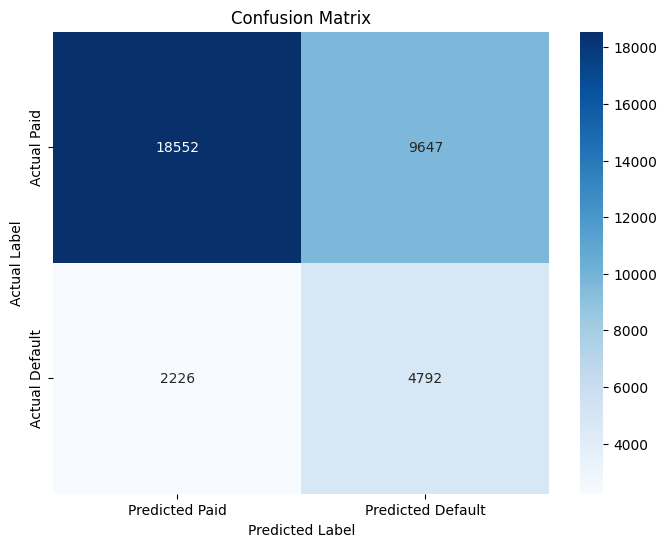

Model saved.


In [112]:
y_pred_proba = model.predict(X_test_processed).flatten()
y_pred_class = (y_pred_proba > 0.5).astype(int)


auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test AUC (Area Under the ROC Curve): {auc:.4f}")


f1 = f1_score(y_test, y_pred_class)
print(f"Test F1-Score (at 0.5 threshold): {f1:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred_class, target_names=['Fully Paid (0)', 'Defaulted (1)']))


print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Paid', 'Predicted Default'],
            yticklabels=['Actual Paid', 'Actual Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

model.save('dl_model.h5')
print("Model saved.")

Displaying training history plots...


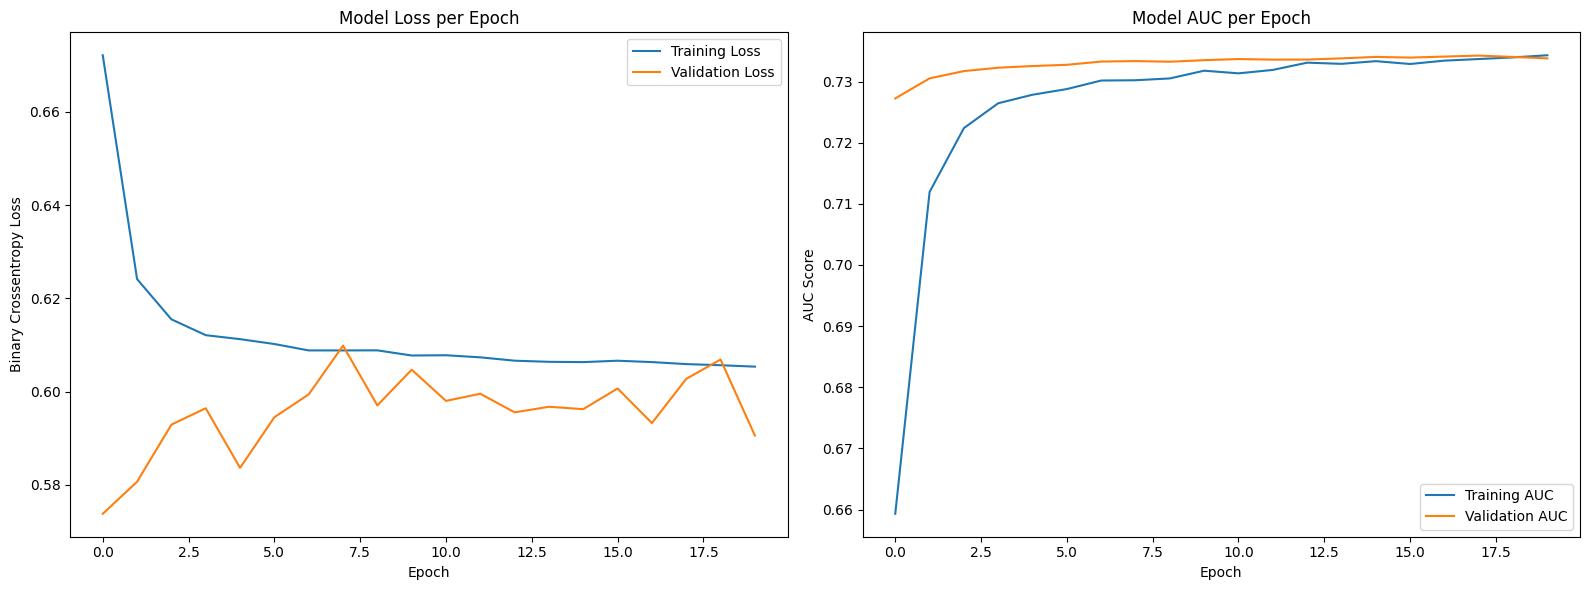

In [113]:
print("Displaying training history plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Binary Crossentropy Loss')
ax1.legend()

# Plot 2: AUC
ax2.plot(history.history['auc'], label='Training AUC')
ax2.plot(history.history['val_auc'], label='Validation AUC')
ax2.set_title('Model AUC per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('AUC Score')
ax2.legend()

plt.tight_layout()
plt.show()

In [114]:
np.savez_compressed(
    'task_3_data.npz',
    X_train_processed=X_train_processed,
    y_train=y_train,
    X_test_processed=X_test_processed,
    y_test=y_test,
    X_train_reward_features=X_train_reward_features.values,
    X_test_reward_features=X_test_reward_features.values,
    feature_names=feature_names
)
print("Data saved to 'task_3_data.npz'.")

Data saved to 'task_3_data.npz'.


> **TASK 3**

In [115]:
import d3rlpy
from d3rlpy.dataset import MDPDataset
from d3rlpy.algos import DiscreteCQLConfig

from d3rlpy.metrics import InitialStateValueEstimationEvaluator
from d3rlpy.metrics import DiscreteActionMatchEvaluator

warnings.filterwarnings('ignore')

In [116]:
print("Step 1: Loading data from 'task_3_data.npz'...")
data = np.load('task_3_data.npz', allow_pickle=True)
X_train_processed = data['X_train_processed']
y_train = data['y_train']
X_train_reward_features = data['X_train_reward_features']
X_test_processed = data['X_test_processed']
y_test = data['y_test']
X_test_reward_features = data['X_test_reward_features']
feature_names = data['feature_names']
print(f"Loaded training states: {X_train_processed.shape}")



print("\nStep 2: Engineering the offline RL dataset...")

def create_rl_dataset(states, outcomes, reward_features):
    num_samples = len(states)

    # Data for Action 1 (Approve)
    approved_states = states
    approved_actions = np.ones(num_samples, dtype=int)
    loan_amnt = reward_features[:, 0]
    int_rate = reward_features[:, 1]
    approved_rewards = np.where(
        outcomes == 0,
        (loan_amnt * int_rate / 100.0),
        -loan_amnt
    ).astype(float)
    approved_terminals = np.ones(num_samples, dtype=float)

    # Synthetic Data for Action 0 (Deny)
    denied_states = states
    denied_actions = np.zeros(num_samples, dtype=int)
    denied_rewards = np.zeros(num_samples, dtype=float)
    denied_terminals = np.ones(num_samples, dtype=float)

    # Combine (UnboundLocalError fixed)
    all_states = np.concatenate([approved_states, denied_states])
    all_actions = np.concatenate([approved_actions, denied_actions])
    all_rewards = np.concatenate([approved_rewards, denied_rewards])
    all_terminals = np.concatenate([approved_terminals, denied_terminals])

    return MDPDataset(
        observations=all_states.astype(np.float32),
        actions=all_actions.astype(np.uint8),
        rewards=all_rewards.astype(np.float32),
        terminals=all_terminals.astype(np.float32)
    )

train_dataset = create_rl_dataset(X_train_processed, y_train, X_train_reward_features)
test_dataset = create_rl_dataset(X_test_processed, y_test, X_test_reward_features)

print(f"Total training transitions (real + synthetic): {train_dataset.size()}")

Step 1: Loading data from 'task_3_data.npz'...
Loaded training states: (140866, 76)

Step 2: Engineering the offline RL dataset...
2025-10-26 09:59.09 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('uint8')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(76,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)])
2025-10-26 09:59.09 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2025-10-26 09:59.11 [info     ] Action size has been automatically determined. action_size=2
2025-10-26 09:59.12 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('uint8')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(76,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)])
2025-10-26 09:59.12 [info     ] Action-space has been automatically determined. action_sp

In [117]:
print("\nStep 3: Defining the Conservative Q-Learning (CQL) agent...")
use_gpu = len(tf.config.list_physical_devices('GPU')) > 0
if use_gpu:
    device = 'cuda:0'
else:
    device = 'cpu'
print(f"Using device: {device}")


cql_config = DiscreteCQLConfig(
    reward_scaler=None,
    action_scaler=None
)

cql_agent = cql_config.create(device=device)



Step 3: Defining the Conservative Q-Learning (CQL) agent...
Using device: cpu


In [118]:
print("\nStep 4: Training the agent...")

value_estimator = InitialStateValueEstimationEvaluator()
action_matcher = DiscreteActionMatchEvaluator()

cql_agent.fit(
    dataset=train_dataset,
    n_steps=10,
    n_steps_per_epoch=10000,
    evaluators={
        'policy_value': value_estimator,
        'action_match': action_matcher
    },
    show_progress=True,
    save_interval=1
)

print("Training complete!")


Step 4: Training the agent...
2025-10-26 09:59.13 [info     ] dataset info                   dataset_info=DatasetInfo(observation_signature=Signature(dtype=[dtype('float32')], shape=[(76,)]), action_signature=Signature(dtype=[dtype('uint8')], shape=[(1,)]), reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]), action_space=<ActionSpace.DISCRETE: 2>, action_size=2)
2025-10-26 09:59.13 [debug    ] Building models...            
2025-10-26 09:59.13 [debug    ] Models have been built.       
2025-10-26 09:59.13 [info     ] Directory is created at d3rlpy_logs/DiscreteCQL_20251026095913
2025-10-26 09:59.13 [info     ] Parameters                     params={'observation_shape': [76], 'action_size': 2, 'config': {'type': 'discrete_cql', 'params': {'batch_size': 32, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none', 'params': {}}, 'compile_graph': False, 'learning_rate': 6.25e-05,

In [119]:
# --- 6. Save Model and Prepare Data for Task 4 ---

print("\nStep 5: Saving policy...")
cql_agent.save_model('cql_policy.pt')

# Get the RL agent's predicted actions on the test set
rl_policy_actions = cql_agent.predict(X_test_processed.astype(np.float32))

# Calculate the ground-truth rewards for both possible actions
test_loan_amnt = X_test_reward_features[:, 0]
test_int_rate = X_test_reward_features[:, 1]

# Ground-truth reward if action == 1 (Approve)
reward_if_approve = np.where(
    y_test == 0,  # 0 = Fully Paid
    (test_loan_amnt * test_int_rate / 100.0), # Reward = Profit
    -test_loan_amnt # 1 = Default, Reward = Loss
).astype(float)

# Ground-truth reward if action == 0 (Deny)
reward_if_deny = np.zeros_like(reward_if_approve, dtype=float)

# Load the trained DL model from Task 2 to get its predictions
try:
    dl_model = tf.keras.models.load_model('dl_model.h5')
    # Corrected typo: dl.model -> dl_model
    dl_model_probas = dl_model.predict(X_test_processed).flatten()
except Exception as e:
    print(f"\nWarning: Could not load 'dl_model.h5'. (Error: {e})")
    print("Using placeholder (zeros) for DL model probabilities.")
    dl_model_probas = np.zeros_like(y_test, dtype=float)

# Save all necessary data for the final analysis
np.savez_compressed(
    'task_4_analysis_data.npz',
    y_test=y_test,
    rl_policy_actions=rl_policy_actions,
    dl_model_probas=dl_model_probas,
    reward_if_approve=reward_if_approve,
    reward_if_deny=reward_if_deny,
    X_test=X_test_processed,
    feature_names=feature_names
)

print("Data for Task 4 saved to 'task_4_analysis_data.npz'")


Step 5: Saving policy...


1101/1101 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Data for Task 4 saved to 'task_4_analysis_data.npz'


> **TASK 4**



In [120]:
print("Loading data from 'task_4_analysis_data.npz'...")
try:
    data = np.load('task_4_analysis_data.npz', allow_pickle=True)
    y_test = data['y_test']
    rl_policy_actions = data['rl_policy_actions']
    dl_model_probas = data['dl_model_probas']
    reward_if_approve = data['reward_if_approve']
    reward_if_deny = data['reward_if_deny']
    X_test = data['X_test']
    feature_names = data['feature_names']
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'task_4_analysis_data.npz' not found.")
    print("Please run Task 2 and Task 3 successfully to generate this file.")
    exit()

Loading data from 'task_4_analysis_data.npz'...
Data loaded successfully.


In [121]:
# Policy 1: Historical Policy (Always Approve)
# Action is always 1 (Approve)
historical_rewards = reward_if_approve
historical_total_profit = np.sum(historical_rewards)
historical_avg_profit = np.mean(historical_rewards)
historical_approval_rate = 1.0

# Policy 2: DL Model Policy (Approve if prob(default) < 0.5)
# Action = 0 (Deny) if proba > 0.5, else 1 (Approve)
dl_policy_actions = (dl_model_probas <= 0.5).astype(int)
dl_rewards = np.where(
    dl_policy_actions == 1,
    reward_if_approve,
    reward_if_deny
)
dl_total_profit = np.sum(dl_rewards)
dl_avg_profit = np.mean(dl_rewards)
dl_approval_rate = np.mean(dl_policy_actions)

# Policy 3: RL Agent Policy (Learned by CQL)
# Actions are directly from rl_policy_actions
rl_rewards = np.where(
    rl_policy_actions == 1,
    reward_if_approve,
    reward_if_deny
)
rl_total_profit = np.sum(rl_rewards)
rl_avg_profit = np.mean(rl_rewards)
rl_approval_rate = np.mean(rl_policy_actions)

In [122]:
print("\n--- Final Policy Comparison (Business Metrics) ---")

results = {
    "Policy": ["1. Historical (Always Approve)", "2. DL Model (Threshold=0.5)", "3. RL Agent (Profit-Max)"],
    "Total Profit on Test Set": [f"${historical_total_profit:,.2f}", f"${dl_total_profit:,.2f}", f"${rl_total_profit:,.2f}"],
    "Average Profit per Loan": [f"${historical_avg_profit:,.2f}", f"${dl_avg_profit:,.2f}", f"${rl_avg_profit:,.2f}"],
    "Approval Rate": [f"{historical_approval_rate*100:.2f}%", f"{dl_approval_rate*100:.2f}%", f"{rl_approval_rate*100:.2f}%"]
}
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


print("\n--- Policy Disagreement Analysis ---")

# Find cases where the models disagree
df = pd.DataFrame()
df['dl_action'] = dl_policy_actions
df['rl_action'] = rl_policy_actions
df['true_outcome'] = y_test # 0=Paid, 1=Default
df['reward_if_approve'] = reward_if_approve

# Case 1: DL Denies, RL Approves
dl_denies_rl_approves = df[
    (df['dl_action'] == 0) & (df['rl_action'] == 1)
]

print(f"\nFound {len(dl_denies_rl_approves)} cases where DL Denied but RL Approved.")
if len(dl_denies_rl_approves) > 0:
    # Analyze these cases: What was the *actual* outcome?
    print("Outcomes of these cases:")
    print(dl_denies_rl_approves['true_outcome'].value_counts(normalize=True))
    print(f"Average reward from these 'missed opportunities': ${dl_denies_rl_approves['reward_if_approve'].mean():.2f}")


# Case 2: DL Approves, RL Denies
dl_approves_rl_denies = df[
    (df['dl_action'] == 1) & (df['rl_action'] == 0)
]

print(f"\nFound {len(dl_approves_rl_denies)} cases where DL Approved but RL Denied.")
if len(dl_approves_rl_denies) > 0:
    # Analyze these cases: What was the *actual* outcome?
    print("Outcomes of these cases:")
    print(dl_approves_rl_denies['true_outcome'].value_counts(normalize=True))
    print(f"Average loss avoided by RL in these cases: ${dl_approves_rl_denies['reward_if_approve'].mean():.2f}")


--- Final Policy Comparison (Business Metrics) ---
                        Policy Total Profit on Test Set Average Profit per Loan Approval Rate
1. Historical (Always Approve)          $-63,972,634.52              $-1,816.53       100.00%
   2. DL Model (Threshold=0.5)           $-6,569,940.06                $-186.56        59.00%
      3. RL Agent (Profit-Max)             $-424,549.21                 $-12.06         1.15%

--- Policy Disagreement Analysis ---

Found 309 cases where DL Denied but RL Approved.
Outcomes of these cases:
true_outcome
0    0.699029
1    0.300971
Name: proportion, dtype: float64
Average reward from these 'missed opportunities': $-1460.86

Found 20681 cases where DL Approved but RL Denied.
Outcomes of these cases:
true_outcome
0    0.892703
1    0.107297
Name: proportion, dtype: float64
Average loss avoided by RL in these cases: $-318.98
